In [2]:
import numpy as np
import pandas as pd

### Quiz_2
- 타이타닉 데이터를 가져와서 연령대별 생존률을 구하고 그래프를 그리세요

In [3]:
# 타이타닉 데이터 가져오기

In [4]:
titanic = pd.read_csv('train.csv')
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# ["Survived","Age"] 컬럼을 가지는 titanic_df 데이터 프레임을 만들고 Age가 NaN인 row 데이터를 삭제

In [6]:
titanic_df = pd.DataFrame(columns = ["Survived","Age"])
titanic_df['Survived'] = titanic['Survived']
titanic_df['Age'] = titanic['Age']
titanic_df = titanic_df.dropna(how='any',axis=0)
titanic_df.tail()

,Survived,Age
885,0,39.0
886,0,27.0
887,1,19.0
889,1,26.0
890,0,32.0


In [7]:
# Ages 컬럼을 만들고 Ages 컬럼에는 연령대에 대한 데이터 삽입

In [8]:
titanic_df['Ages'] = titanic_df['Age'].apply(lambda age: int(age//10 * 10))
titanic_df.tail()

,Survived,Age,Ages
885,0,39.0,30
886,0,27.0,20
887,1,19.0,10
889,1,26.0,20
890,0,32.0,30


In [9]:
# 연령대별로 생존률

In [10]:
titanic_tmp = titanic_df.groupby(['Ages','Survived']).size().reset_index(name='Counts')
titanic_tmp

,Ages,Survived,Counts
0,0,0,24
1,0,1,38
2,10,0,61
3,10,1,41
4,20,0,143
5,20,1,77
6,30,0,94
7,30,1,73
8,40,0,55
9,40,1,34


In [11]:
pivot1 = titanic_tmp.pivot('Ages','Survived','Counts')
pivot1 = pivot1.dropna(how='any',axis=0)
pivot1

Survived,0,1
Ages,,
0,24.0,38.0
10,61.0,41.0
20,143.0,77.0
30,94.0,73.0
40,55.0,34.0
50,28.0,20.0
60,13.0,6.0


In [25]:
pivot1['survived_rate'] = pivot1[1] / (pivot1[0]+pivot1[1]) * 100
pivot1 = pivot1.round(2)
pivot1

Survived,0,1,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58


In [26]:
# 컬럼명을 변경하고 연령대별 생존, 사망, 생존률 그래프 그리기

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [32]:
pivot1 = pivot1.rename(columns={0:'non_survived',1:'survived'})
pivot1

Survived,non_survived,survived,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58


In [33]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

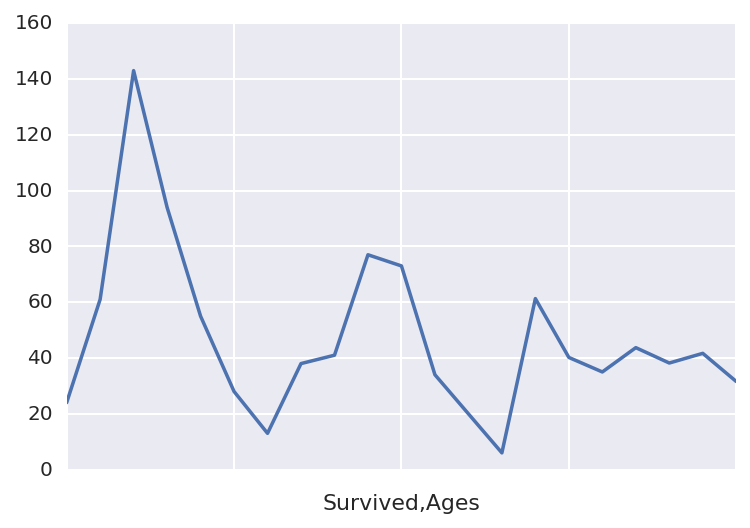

In [43]:
pivot1.plot()

plt.figure(figsize=(10,5))

plt.show()

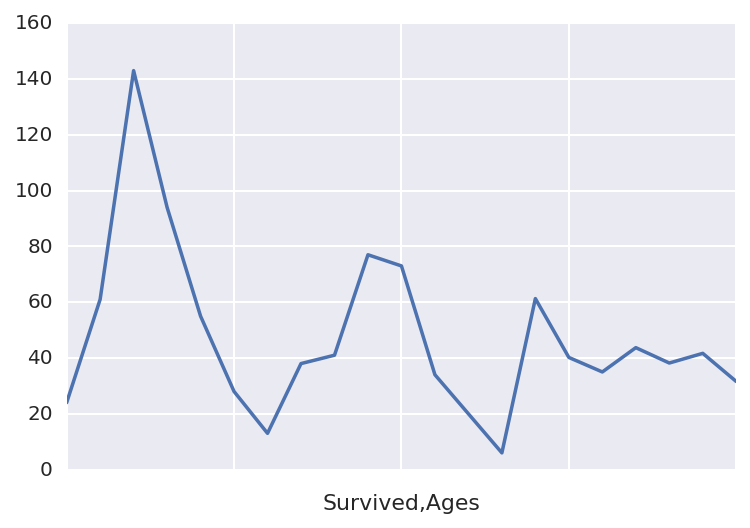

In [49]:
# pivot1 = pivot1.stack()
pivot1.plot(x='Ages',y='survived_rate')
plt.show()